In [1]:
#Loading required libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#importing dataset : Unemployment in India file
unemp_ind = pd.read_csv(r"C:\Users\mailm\OneDrive\Documents\Unemployment in India.csv")

In [3]:
#visualizing dataset
unemp_ind

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Data cleaning and Preprocessing

In [5]:
unemp_ind.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
#Checking for null values
unemp_ind.isnull().sum()

Region                                      14
Date                                        14
Frequency                                   14
Estimated Unemployment Rate (%)             14
Estimated Employed                          14
Estimated Labour Participation Rate (%)     14
Area                                        14
Unnamed: 7                                 754
Unnamed: 8                                 754
Unnamed: 9                                 754
Unnamed: 10                                754
Unnamed: 11                                754
Unnamed: 12                                754
Unnamed: 13                                754
Unnamed: 14                                754
Unnamed: 15                                754
Unnamed: 16                                754
Unnamed: 17                                754
Unnamed: 18                                754
Unnamed: 19                                754
Unnamed: 20                                754
Unnamed: 21  

In [7]:
#Removing unnamed columns
for col in unemp_ind.columns:
    if 'Unnamed' in col:
        del unemp_ind[col]
unemp_ind=unemp_ind
     

In [8]:
unemp_ind.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [9]:
#again checking for null values after removing unnamed columns
unemp_ind.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [10]:
#Dropping null values
unemp_ind=unemp_ind.dropna()

In [11]:
unemp_ind.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [12]:
#checking for duplicate values
unemp_ind.duplicated().sum()

0

In [13]:
#dataset after cleaning
unemp_ind

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [14]:
unemp_ind.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [15]:
unemp_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [16]:
unemp_ind

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [17]:
unemp_ind.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [18]:
unemp_ind.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [19]:
#importing data set : Unemployment_Rate_upto_11_2020
unemp_20=pd.read_csv(r"C:\Users\mailm\OneDrive\Documents\Unemployment_Rate_upto_11_2020.csv")

In [20]:
#visualizing data set
unemp_20

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Data cleaning and preprocessing

In [22]:
#columns in Unemployment_Rate_upto_11_2020 data
unemp_20.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'Longitude', 'Latitude', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [23]:
#checking for null values
unemp_20.isnull().sum()

Region                                       0
Date                                         0
Frequency                                    0
Estimated Unemployment Rate (%)              0
Estimated Employed                           0
Estimated Labour Participation Rate (%)      0
Region.1                                     0
Longitude                                    0
Latitude                                     0
Unnamed: 9                                 267
Unnamed: 10                                267
Unnamed: 11                                267
Unnamed: 12                                267
Unnamed: 13                                267
Unnamed: 14                                267
Unnamed: 15                                267
Unnamed: 16                                267
Unnamed: 17                                267
Unnamed: 18                                267
Unnamed: 19                                267
Unnamed: 20                                267
Unnamed: 21  

In [24]:
#deleting unnamed columns
for col in unemp_20.columns:
    if 'Unnamed' in col:
        del unemp_20[col]
unemp_20=unemp_20

In [25]:
#dataset after cleaning
unemp_20

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [26]:
unemp_20.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [27]:
unemp_20.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'Longitude', 'Latitude'],
      dtype='object')

In [28]:
#checking for duplicate values
unemp_20.duplicated().sum()

0

In [29]:
#renaming columns 
unemp_20=unemp_20.rename(columns={'Region':'State','Region.1':'Zone'})

In [30]:
unemp_20.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Zone',
       'Longitude', 'Latitude'],
      dtype='object')

In [31]:
#Label Encoding-handling categorical variables by converting them into numerical format.
#creating an instance of LabelEncoder function
le=LabelEncoder()

In [32]:
#unemp_ind data set before LabelEncoding
unemp_ind

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [33]:
#for unemp_ind data
unemp_ind['Region']=le.fit_transform(unemp_ind['Region'])
unemp_ind['Date']=le.fit_transform(unemp_ind['Date'])
unemp_ind['Frequency']=le.fit_transform(unemp_ind['Frequency'])
unemp_ind['Area']=le.fit_transform(unemp_ind['Area'])    

C:\Users\mailm\AppData\Local\Temp\ipykernel_7956\2561102264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_ind['Region']=le.fit_transform(unemp_ind['Region'])
C:\Users\mailm\AppData\Local\Temp\ipykernel_7956\2561102264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_ind['Date']=le.fit_transform(unemp_ind['Date'])
C:\Users\mailm\AppData\Local\Temp\ipykernel_7956\2561102264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [34]:
#unemp_ind  data set after LabelEncoding
unemp_ind

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,0,8,0,3.65,11999139.0,43.24,0
1,0,2,0,3.05,11755881.0,42.05,0
2,0,10,0,3.75,12086707.0,43.50,0
3,0,11,0,3.32,12285693.0,43.97,0
4,0,4,0,5.17,12256762.0,44.68,0
...,...,...,...,...,...,...,...
749,27,0,0,7.55,10871168.0,44.09,1
750,27,7,0,6.67,10806105.0,43.34,1
751,27,1,0,15.63,9299466.0,41.20,1
752,27,9,0,15.22,9240903.0,40.67,1


In [35]:
#for unemp_20 data
unemp_20['State']=le.fit_transform(unemp_20['State'])
unemp_20['Date']=le.fit_transform(unemp_20['Date'])
unemp_20['Frequency']=le.fit_transform(unemp_20['Frequency'])
unemp_20['Zone']=le.fit_transform(unemp_20['Zone'])

In [36]:
#unemp_20 after LabelEncoding
unemp_20

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Zone,Longitude,Latitude
0,0,4,0,5.48,16635535,41.02,3,15.9129,79.740
1,0,0,0,5.83,16545652,40.90,3,15.9129,79.740
2,0,5,0,5.79,15881197,39.18,3,15.9129,79.740
3,0,1,0,20.51,11336911,33.10,3,15.9129,79.740
4,0,6,0,17.43,12988845,36.46,3,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,26,2,0,7.29,30726310,40.39,0,22.9868,87.855
263,26,7,0,6.83,35372506,46.17,0,22.9868,87.855
264,26,8,0,14.87,33298644,47.48,0,22.9868,87.855
265,26,3,0,9.35,35707239,47.73,0,22.9868,87.855


In [37]:
# EXPLORATORY DATA ANALYSIS

In [38]:
#Univariate Analysis : plotting the data using seaborn library

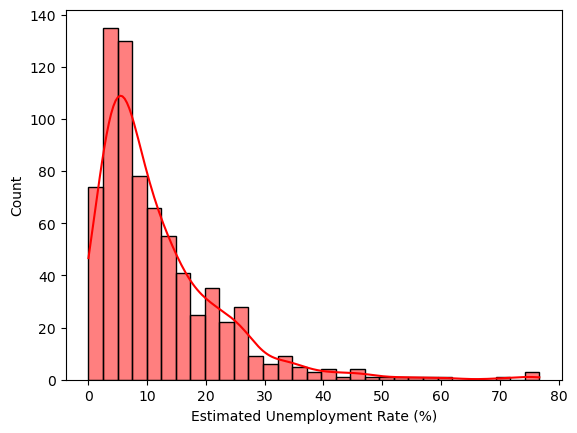

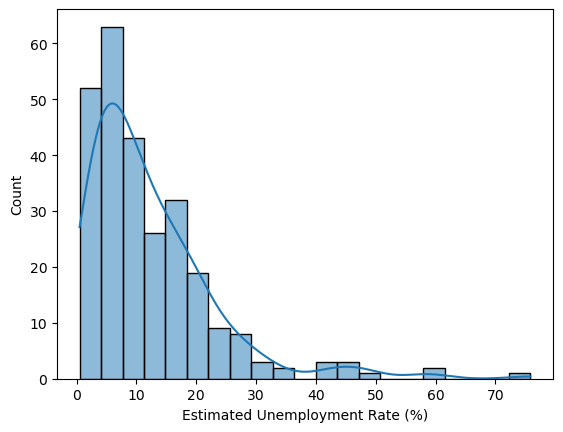

In [39]:
sns.histplot(data=unemp_ind,x='Estimated Unemployment Rate (%)',kde=True,color='red')
plt.show()

sns.histplot(data=unemp_20,x='Estimated Unemployment Rate (%)',kde=True)
plt.show()

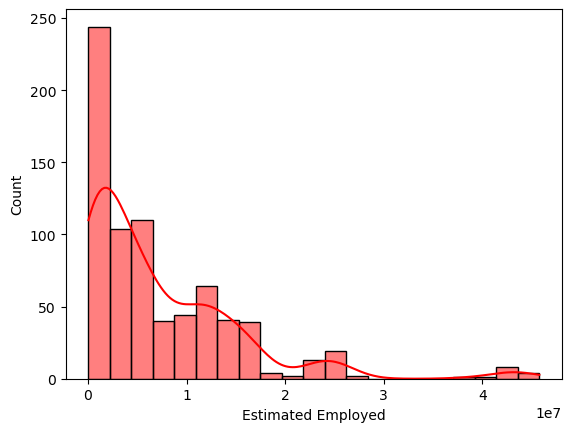

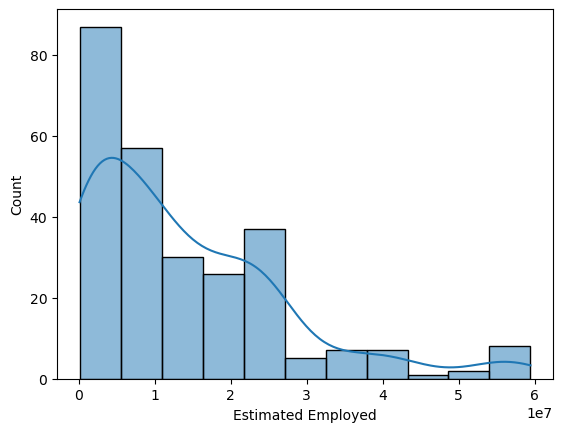

In [40]:
sns.histplot(data=unemp_ind,x='Estimated Employed',kde=True,color='red')
plt.show()

sns.histplot(data=unemp_20,x='Estimated Employed',kde=True)
plt.show()

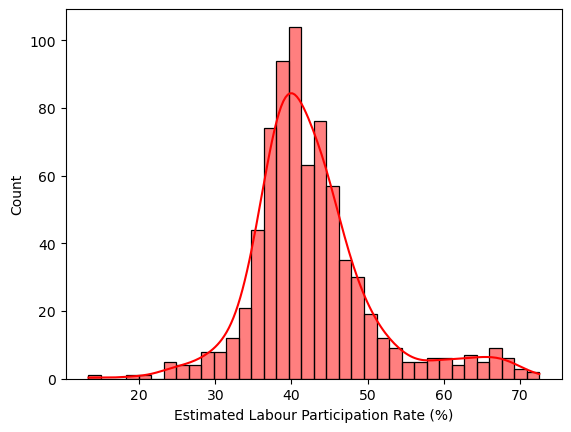

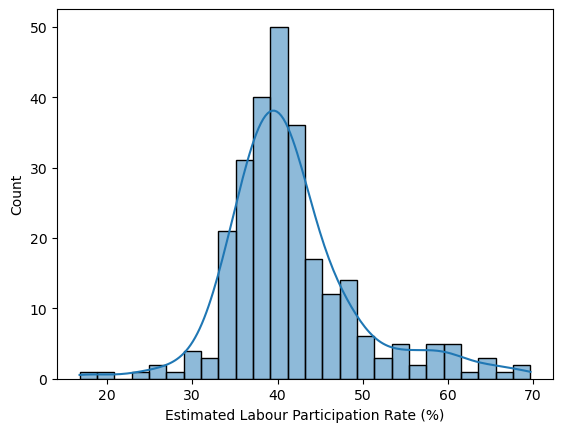

In [41]:
sns.histplot(data=unemp_ind,x='Estimated Labour Participation Rate (%)',kde=True,color='red')
plt.show()

sns.histplot(data=unemp_20,x='Estimated Labour Participation Rate (%)',kde=True)
plt.show()

In [42]:
# Bivariate Analysis

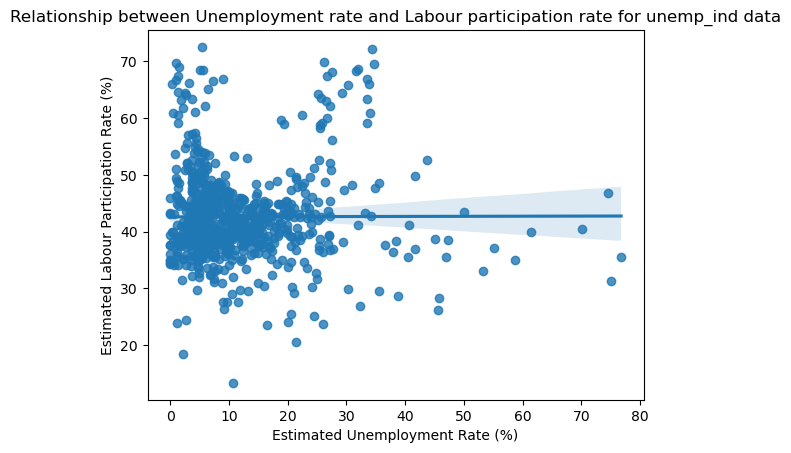

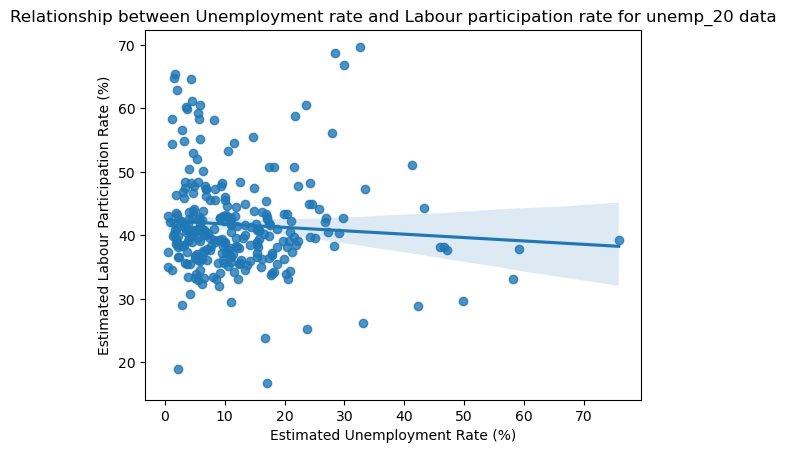

In [43]:
sns.regplot(data=unemp_ind,x='Estimated Unemployment Rate (%)',y='Estimated Labour Participation Rate (%)')
plt.title('Relationship between Unemployment rate and Labour participation rate for unemp_ind data')
plt.show()

sns.regplot(data=unemp_20,x='Estimated Unemployment Rate (%)',y='Estimated Labour Participation Rate (%)')
plt.title('Relationship between Unemployment rate and Labour participation rate for unemp_20 data')
plt.show()

In [44]:
# Multivariate Analysis

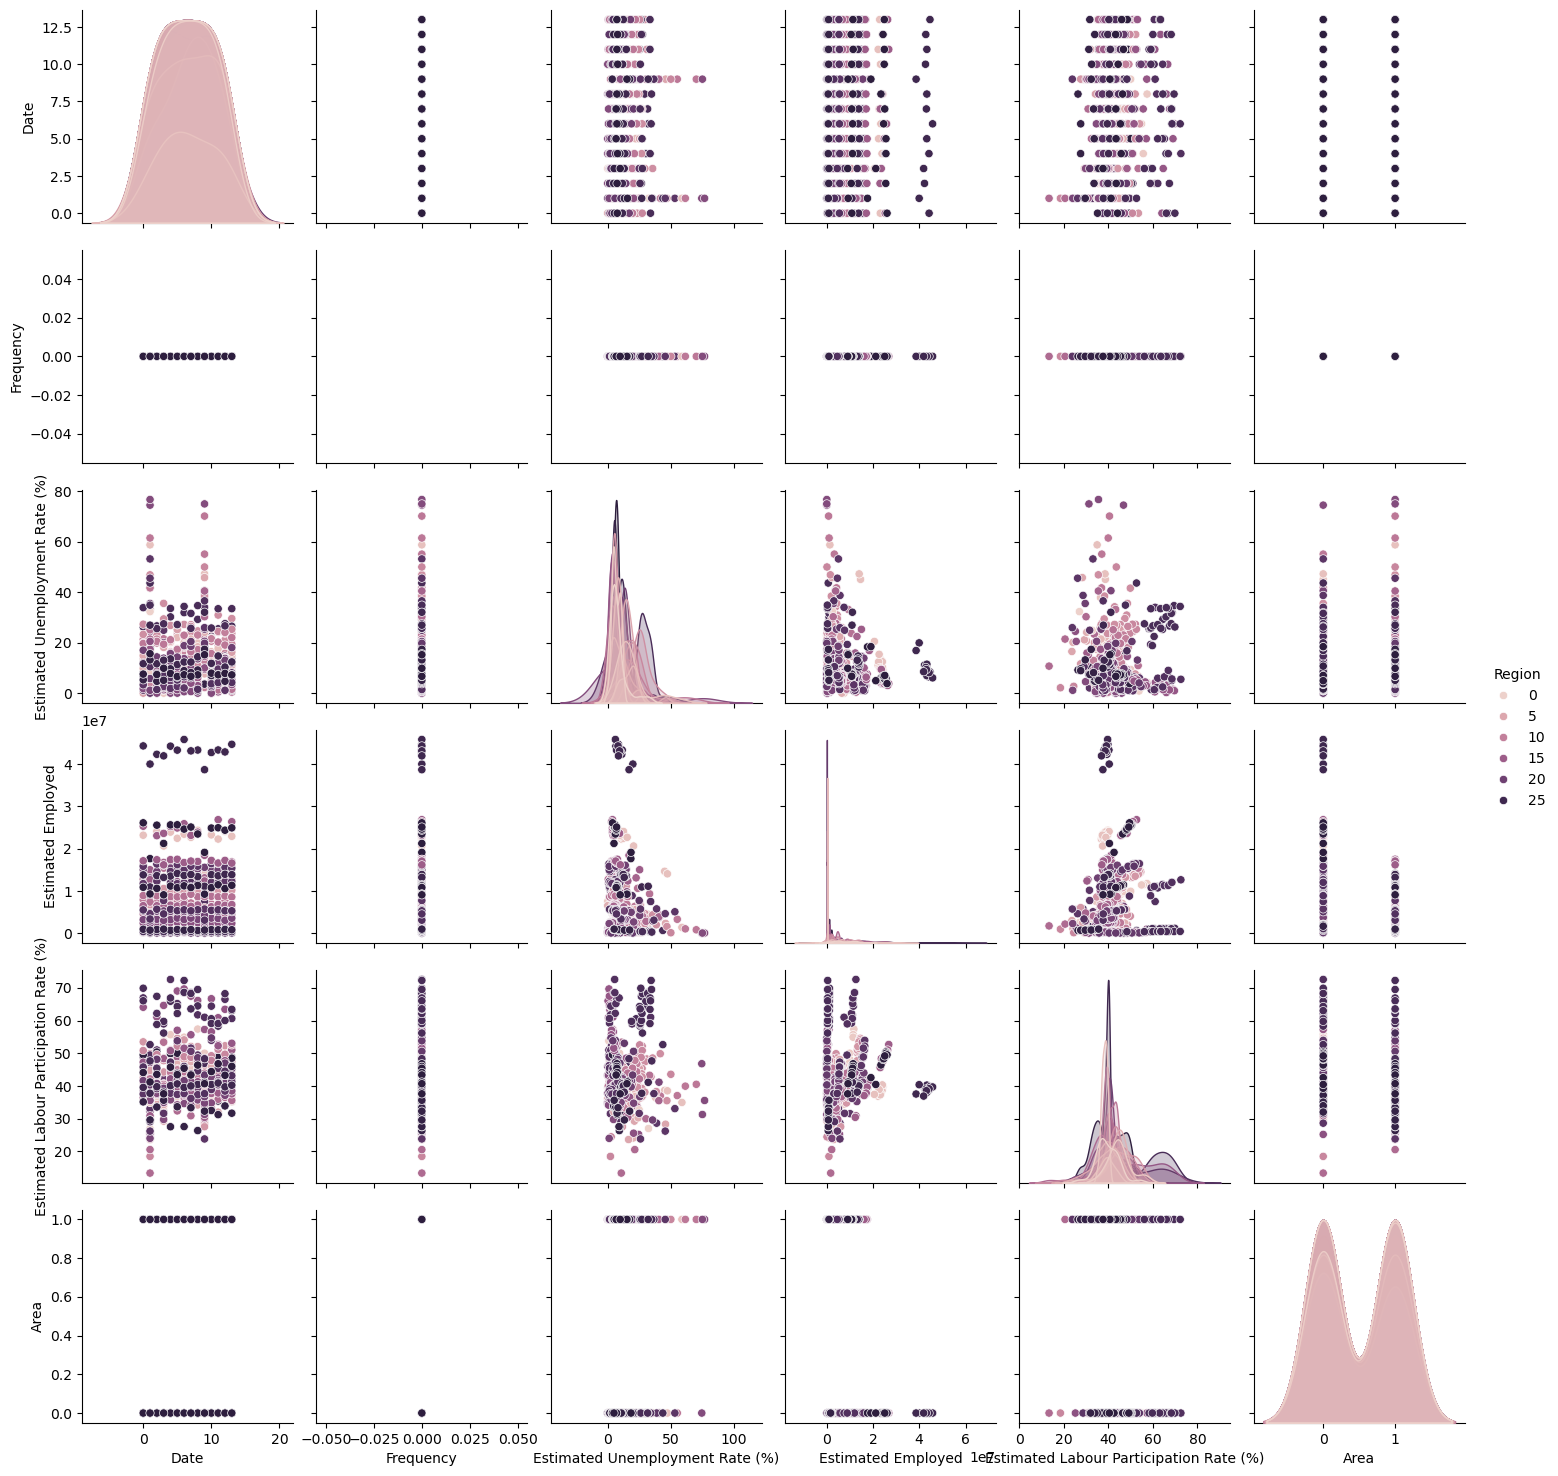

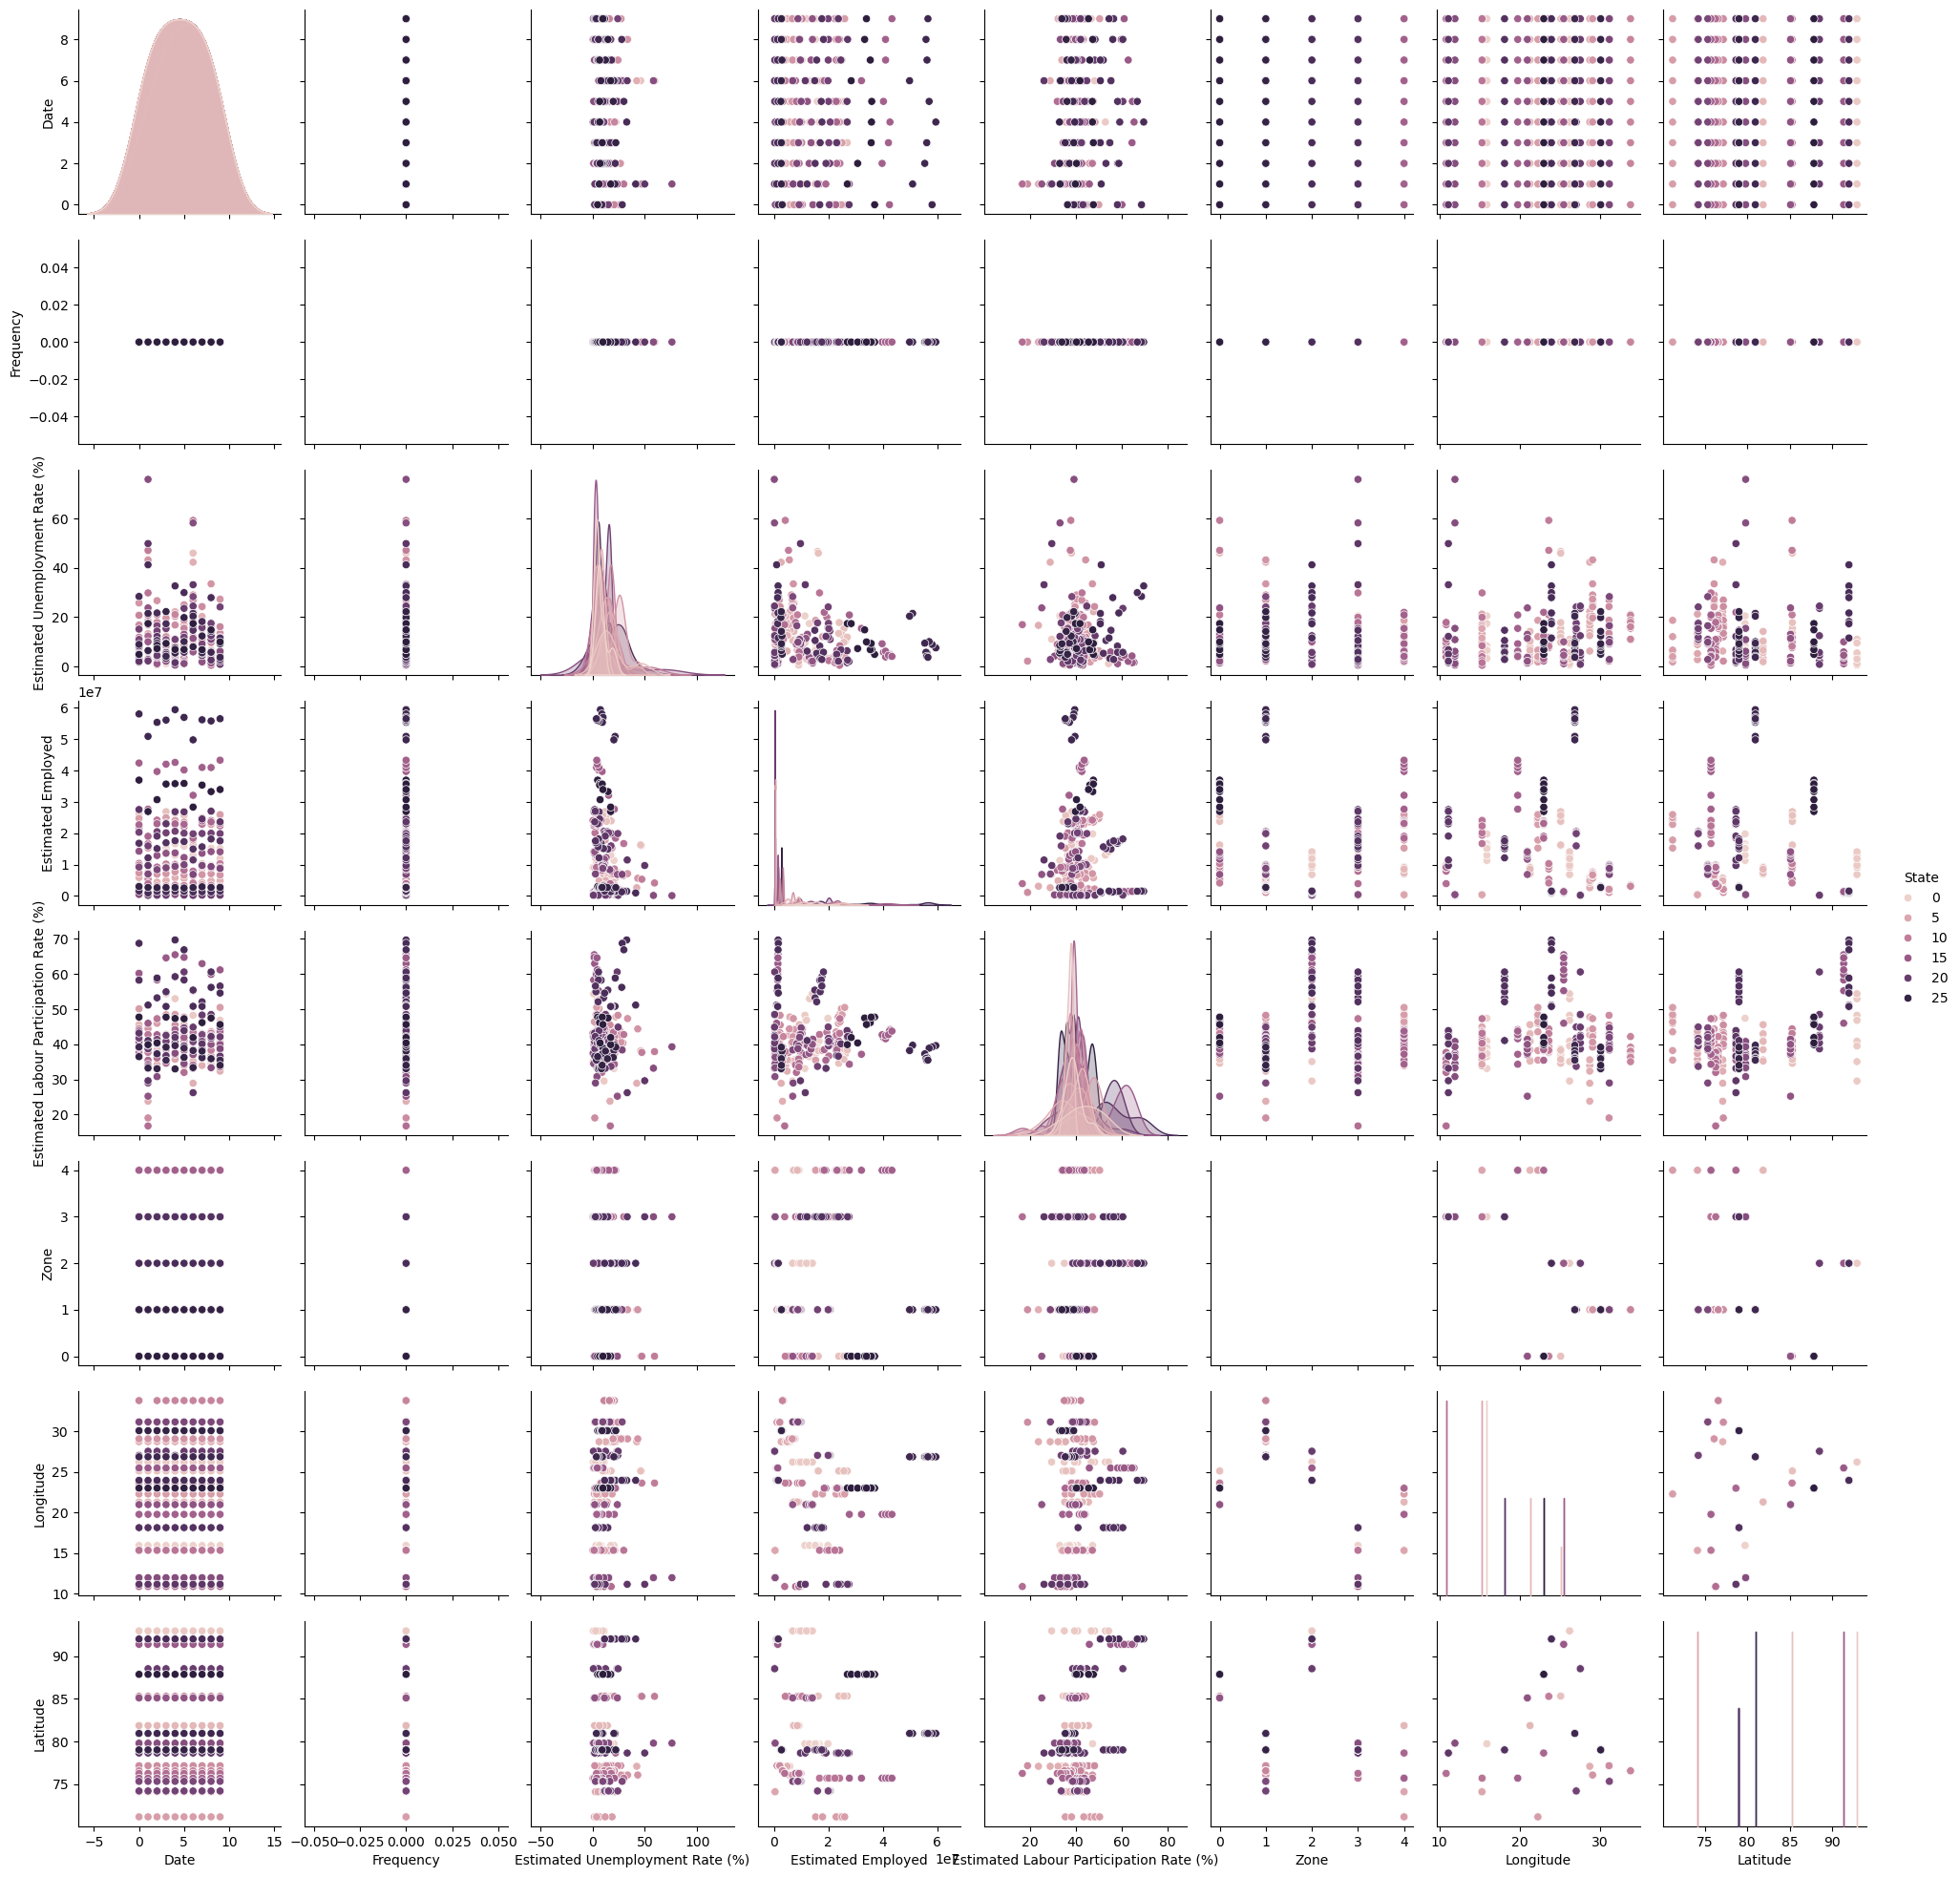

In [45]:
#using Pairplot to visualize Patterns, Trends, and Anomalies
sns.pairplot(unemp_ind,hue='Region')
plt.show()

sns.pairplot(unemp_20,hue='State')
plt.show()

In [46]:
# Creating Correlation Matrix : to quantify the degree of linear relationship between pairs of variables.

In [47]:
corr_matrix1=unemp_ind.corr()
corr_matrix1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
Region,1.000000,-0.000547,NaN,-0.056726,0.210371,0.169119,-0.013472
Date,-0.000547,1.000000,NaN,-0.079406,0.012668,0.092793,0.005094
Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated Unemployment Rate (%),-0.056726,-0.079406,NaN,1.000000,-0.222876,0.002558,0.132563
Estimated Employed,0.210371,0.012668,NaN,-0.222876,1.000000,0.011300,-0.358902
Estimated Labour Participation Rate (%),0.169119,0.092793,NaN,0.002558,0.011300,1.000000,-0.219717
Area,-0.013472,0.005094,NaN,0.132563,-0.358902,-0.219717,1.000000


In [48]:
corr_matrix2=unemp_20.corr()
corr_matrix2

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Zone,Longitude,Latitude
State,1.000000,0.003568,NaN,-0.020823,0.234531,0.197804,-0.201465,0.009293,0.145440
Date,0.003568,1.000000,NaN,-0.087194,0.014531,0.049004,-0.003375,0.012913,0.005847
Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated Unemployment Rate (%),-0.020823,-0.087194,NaN,1.000000,-0.245176,-0.073540,-0.236189,0.149976,-0.023976
Estimated Employed,0.234531,0.014531,NaN,-0.245176,1.000000,-0.047948,0.018463,-0.113664,-0.119321
Estimated Labour Participation Rate (%),0.197804,0.049004,NaN,-0.073540,-0.047948,1.000000,0.085358,0.080372,0.397836
Zone,-0.201465,-0.003375,NaN,-0.236189,0.018463,0.085358,1.000000,-0.593279,-0.337161
Longitude,0.009293,0.012913,NaN,0.149976,-0.113664,0.080372,-0.593279,1.000000,0.125895
Latitude,0.145440,0.005847,NaN,-0.023976,-0.119321,0.397836,-0.337161,0.125895,1.000000


In [49]:
# Plotting correlation Matrix Heatmap : visualizing relationships

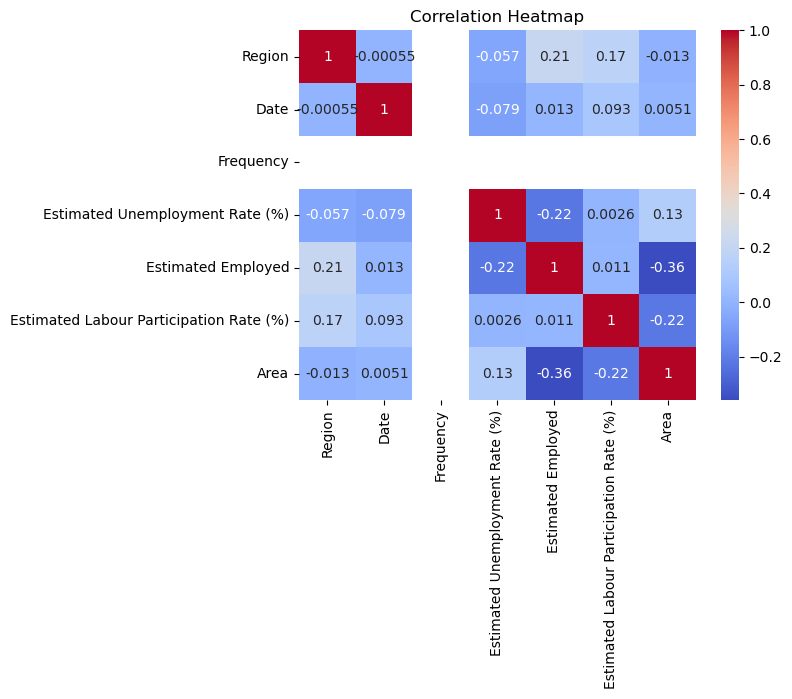

In [50]:
sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

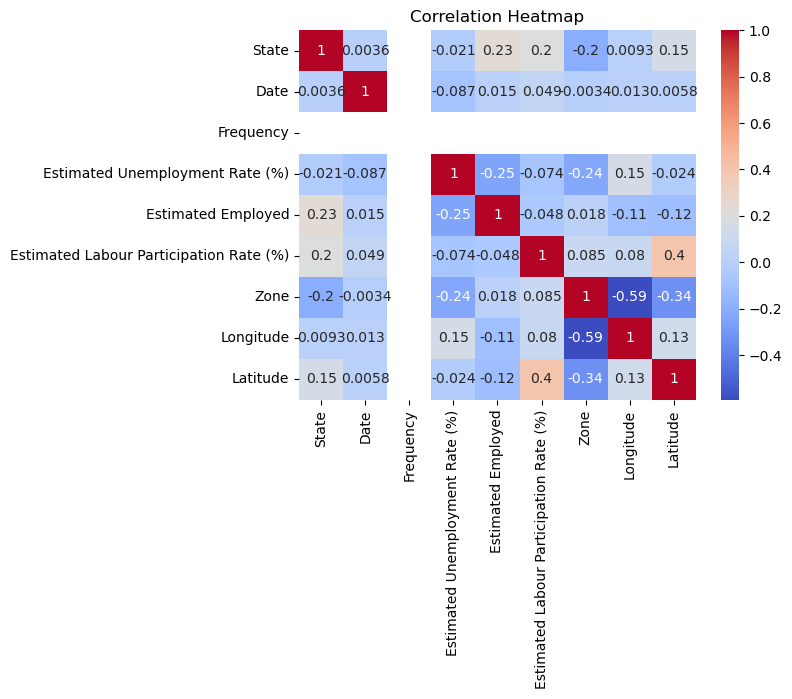

In [51]:
sns.heatmap(corr_matrix2, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [52]:
#MODELLING : using unemployment in india data set
#I am using Random Forest and XGBoost models as both are powerful machine learning algorithms commonly used for regression and classification tasks.

In [53]:
#preparing data

In [54]:
#Splitting data into features and labels
x=unemp_ind.drop('Estimated Unemployment Rate (%)',axis=1)
y=unemp_ind['Estimated Unemployment Rate (%)']
#Splitting data into train and test sets using train_test_split from scikit-learn library
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=123)
print(x.shape, x_train.shape, x_test.shape)

(740, 6) (592, 6) (148, 6)


In [55]:
#Training the Algorithm

In [56]:
#Standardization

#creating an instance of StandardScaler
s_scaler=StandardScaler()
#now we fit 80% of our data as training data set
x_train_scaled=s_scaler.fit_transform(x_train)
x_test_scaled=s_scaler.fit_transform(x_test)

In [57]:
#Random Forcast Model

#creating an instance of RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [58]:
#prediction using RandomForestRegressor
rf_predictions=rf_model.predict(x_test_scaled)
rf_predictions

array([ 8.6378, 12.5529, 11.6613,  7.5807,  3.9361,  7.2644,  5.9023,
       59.4857, 61.5958, 19.7747, 14.5311, 58.072 ,  7.7555, 19.4106,
        9.5138, 24.2429, 16.8439, 15.8964, 12.8577, 11.3087, 59.2707,
       58.7162,  9.7323,  4.946 , 64.3511,  7.6209, 59.6183,  4.77  ,
       11.6122,  9.6181,  3.6855,  2.8094, 18.8168,  8.9578,  8.527 ,
       10.5028, 11.4364, 58.8393, 59.481 , 58.0318,  5.6975, 59.7671,
        8.5246,  7.3331, 10.2277, 10.9913,  5.2453, 17.2768, 10.0052,
        9.3846, 13.5525, 58.751 ,  8.5811, 15.2404,  7.02  ,  9.8936,
       19.6942,  9.3548, 57.7546, 12.3317, 58.5275, 58.7629,  6.7911,
        9.6941, 58.9371,  7.9942,  2.9929, 10.5593, 18.394 ,  7.6712,
       58.0816, 16.6224, 12.7099, 10.5465,  5.4905, 21.0175,  9.6847,
        6.7446, 57.767 , 19.7577, 59.3366, 59.615 , 59.2113, 18.5496,
        4.8062,  7.6036,  8.7945,  9.2877, 14.5932, 64.138 ,  6.9067,
        5.6595, 62.0794, 61.2662,  7.5166, 16.5623, 57.915 ,  5.219 ,
        7.2563,  6.4

In [59]:
#creating dataframe rf_predict and assigning predicted values
rf_predict=pd.DataFrame(rf_predictions,columns=['rf_predictions'])

In [60]:
rf_predict

,rf_predictions
0,8.6378
1,12.5529
2,11.6613
3,7.5807
4,3.9361
...,...
143,5.7252
144,57.8547
145,3.5183
146,13.1856


In [61]:
y_test

249     7.07
749     7.55
171     8.85
689     6.74
209     1.50
       ...  
227    15.09
59     15.84
192     3.76
654    18.54
314    31.61
Name: Estimated Unemployment Rate (%), Length: 148, dtype: float64

In [62]:
#XGBoost Model
xgb_model=XGBRegressor()
xgb_model.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
#prediction using XGBoost model
xgb_predictions=xgb_model.predict(x_test_scaled)

In [64]:
#creating dataframe rf_predict and assigning predicted values
xgb_predict=pd.DataFrame(xgb_predictions,columns=['xgb_predictions'])
xgb_predict

,xgb_predictions
0,5.365258
1,8.121232
2,6.713573
3,6.915139
4,5.640842
...,...
143,3.065835
144,66.829788
145,3.076011
146,13.928171


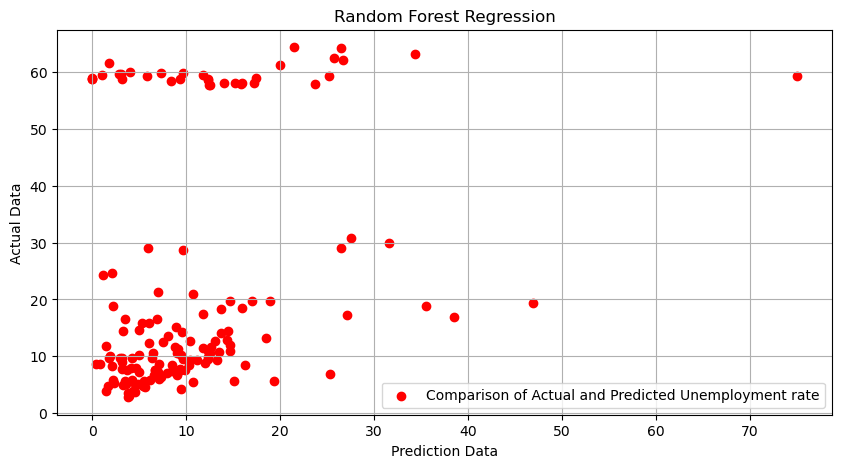

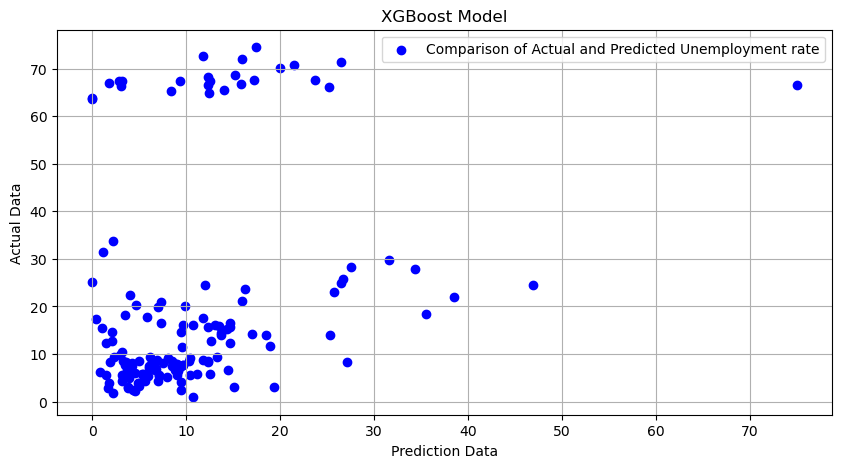

In [65]:
#Scatter Plot for Random_Forest model
plt.figure(figsize=(10,5))
plt.scatter(y_test,rf_predictions,color='red',label='Comparison of Actual and Predicted Unemployment rate')
plt.legend()
plt.grid()         
plt.title('Random Forest Regression')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')  
plt.show()  

#Scatter Plot for XGBoost model
plt.figure(figsize=(10,5))
plt.scatter(y_test,xgb_predictions,color='blue',label='Comparison of Actual and Predicted Unemployment rate')
plt.legend()
plt.grid()
plt.title('XGBoost Model')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')  
plt.show()           

In [66]:
#MODEL EVALUATION

In [67]:
#random_forest_model evaluation
rf_mse=mean_squared_error(y_test,rf_predict)
rf_r2=r2_score(y_test,rf_predict)
print("for Random Forest Model ")
print( "mean_squared_error is :", rf_mse)
print("AND R^2_score is :",rf_r2)

#XGBoost_model evaluation
xgb_mse=mean_squared_error(y_test,xgb_predict)
xgb_r2=r2_score(y_test,xgb_predict)
print("for XGBoost Model ")
print( "mean_squared_error is :", xgb_mse)
print("AND R^2_score is :",xgb_r2)

for Random Forest Model 
mean_squared_error is : 555.5271083881755
AND R^2_score is : -4.7978263487872175
for XGBoost Model 
mean_squared_error is : 559.3511553504748
AND R^2_score is : -4.83773648080822
